## Notas de aula de Mecânica Quântica <br> Autor: Jonas Maziero

# Oscilador harmônico quântico 1D
Aqui apresentamos a solução analítica do oscilador harmônico quântico unidimensional (OHQ1D), ou seja, obtemos as autoenergias e autofunções solucionando a equação diferencial de Schrödinger.

## Equação de Schrödinger
Um sistema clássico com força restauradora $$F=-kx,$$ que corresponde a uma energia potencial
\begin{equation}
U(x)=-\int_{0}^{x}F(x')dx' = k\int_{0}^{x}x'dx' = \frac{kx^{2}}{2} = 2m\pi^{2}\nu^{2}x^{2}.
\end{equation}
com $U(x=0):=0$, tem um movimento oscilatório harmônico de frequência angular 
$$\omega=2\pi\nu=\sqrt{k/m}\therefore k=m4\pi^{2}\nu^{2}.$$
A dependência dessa energia potencial com $x$ e $k$ está mostrada na figura abaixo.

In [1]:
import numpy as np
from ipywidgets import interactive
from matplotlib import pyplot as plt

def Uoa(k):
    plt.figure(figsize = (6,3), dpi = 100)
    x = np.arange(-10,10,0.05); y = 0.5*k*x**2
    plt.xlim(-10,10); plt.ylim(0,100)
    plt.plot(x,y); plt.xlabel(r'$x$'); plt.ylabel(r'$U$')
    plt.annotate(r'$k=$'+str(k)[:5], xy=(-1.3,10), 
                 xytext=(-1.3,10), fontsize=12) 
    plt.show()
    
interactive(Uoa, k = (0.1,10,0.5))

interactive(children=(FloatSlider(value=4.6, description='k', max=10.0, min=0.1, step=0.5), Output()), _dom_cl…

Usando $U(x)=2m\pi^{2}\nu^{2}x^{2}$, a equação de Schrödinger independente do tempo unidomensional (EqSIT1D) para o OHQ1D fica escrita como
\begin{align}
& -\frac{\hbar^{2}}{2m}\partial_{xx}\Xi(x) + 2m\pi^{2}\nu^{2}x^{2}\Xi(x)=E\Xi(x) \\
&\therefore \partial_{xx}\Xi(x) +\left(\frac{2mE}{\hbar^{2}}-\frac{4m^{2}\pi^{2}\nu^{2}x^{2}}{\hbar^{2}}\right)\Xi(x)=0.
\end{align}
Vamos reescrever essa equação em uma forma conveniente. Começamos definindo
\begin{equation}
\beta := \frac{2mE}{\hbar^{2}}\text{, }\alpha := \frac{2m\pi\nu}{\hbar},
\end{equation}
obtendo assim
\begin{equation}
\partial_{xx}\Xi(x) +\left(\beta-\alpha^{2}x^{2}\right)\Xi(x)=0.
\end{equation}

### Mudança de variável
Seguindo, fazemos a seguinte mundança de variável
\begin{equation}
u:=\sqrt{\alpha}x \therefore u^{2}=\alpha x^{2},
\end{equation}
da qual notamos que
\begin{align}
& \partial_{x}\Xi = \partial_{x}u\partial_{u}\Xi = \sqrt{\alpha}\partial_{u}\Xi, \\
& \partial_{xx}\Xi = \sqrt{\alpha}\partial_{x}\partial_{u}\Xi = \sqrt{\alpha}\partial_{u}\partial_{x}\Xi = \alpha\partial_{uu}\Xi.
\end{align}
Substituindo essa relação na equação diferencial acima, segue que
\begin{align}
& \alpha\partial_{uu}\Xi(u) + \left(\beta-\alpha^{2}u^{2}/\alpha\right)\Xi(u)=0, \\
& \therefore \partial_{uu}\Xi(u) + \left(\beta/\alpha-u^{2}\right)\Xi(u)=0. \hspace{1cm} (\star)
\end{align}

### Solução para $|u|\rightarrow\infty$
Vamos procurar a forma geral para a solução desta última equação diferencial analisando primeiramente o limite $U(|x|\rightarrow\infty)\equiv U(|u|\rightarrow\infty)\rightarrow\infty$. Nesse caso $\beta/\alpha-u^{2}\approx u^{2}$ e assim
\begin{equation}
\partial_{uu}\Xi(u) -u^{2}\Xi(u)=0.
\end{equation}
Pode-se verificar que a função
\begin{equation}
\Xi(u) = c_{c}e^{u^{2}/2}+c_{d}e^{-u^{2}/2}
\end{equation}
é solução dessa equação diferencial no limite de $|u|\rightarrow\infty$. Como a densidade de probabilidade dever ser finita quando $|u|\rightarrow\infty$, e nesse limite $e^{u^{2}/2}\rightarrow\infty$, fazemos
\begin{equation}
c_{c} := 0,
\end{equation}
obtendo assim
\begin{equation}
\Xi(u) = c_{d}e^{-u^{2}/2}.
\end{equation}


### Proposta de solução geral
A partir dessa solução para esses casos limites, de posições muito longe da "posição de equilíbrio", propomos uma solução geral para a equação diferencial $(\star)$ da forma
\begin{equation}
\Xi(u) = c_{d}e^{-u^{2}/2}H(u),
\end{equation}
em que $H(u)$ deve ser uma função que varia mais lentamente que $e^{-u^{2}/2}$ quando $|u|\rightarrow\infty$, para que $|\Xi|^{2}$ permaneça finita. Notando que

\begin{align}
\partial_{u}\Xi(u) &= c_{d}(-2u/2)e^{-u^{2}/2}H(u)+c_{d}e^{-u^{2}}\partial_{u}H(u), \\
\partial_{uu}\Xi(u) &= -c_{d}e^{-u^{2}/2}H(u) - c_{d}u(-2u/2)e^{-u^{2}/2}H(u) - c_{d}ue^{-u^{2}/2}\partial_{u}H(u)+c_{d}(-2u/2)e^{-u^{2}/2}\partial_{u}H(u)+c_{d}e^{-u^{2}/2}\partial_{uu}H(u) \\
& = c_{d}e^{-u^{2}/2}\left(-H(u)+u^{2}H(u)-2u\partial_{u}H(u)+\partial_{uu}H(u)\right),
\end{align}
e substituindo essa proposta de solução na equação $(\star)$, obtemos uma equação diferencial para a função $H(u)$, a chamada __equação diferencial de Hermite__:
\begin{align}
& c_{d}e^{-u^{2}/2}\left(-H(u)+u^{2}H(u)-2u\partial_{u}H(u)+\partial_{uu}H(u)\right)+ \left(\beta/\alpha-u^{2}\right)c_{d}e^{-u^{2}/2}H(u)=0, \\
& \therefore \partial_{uu}H(u)-2u\partial_{u}H(u)+(\beta/\alpha-1)H(u)=0. \hspace{1cm} (\star\star)
\end{align}

### Solução por série de potências <br> Método de Frobenius
Para obter as soluções da equação diferencial $(\star\star)$, escreveremos
\begin{align}
H(u) & = \sum_{l=0}^{\infty}a_{l}u^{l} \\
& = a_{0} +a_{1}u+a_{2}u^{2}+a_{3}u^{3}+\cdots.
\end{align}

Vale observar que as potências $u^{l}$, com $l=0,1,2,\cdots$, formam uma base para funções $f:\mathbb{R}\rightarrow\mathbb{R}$. Por isso, qualquer função pode ser escrita como uma série de potências como acima.

Seguindo, olhamos para as derivadas:
\begin{align}
\partial_{u}H(u) & = \partial_{u}\left(a_{0}+\sum_{l=1}^{\infty}a_{l}u^{l}\right) = 0 + \sum_{l=1}^{\infty}a_{l}lu^{l-1} = \sum_{m=0}^{\infty}a_{m+1}(m+1)u^{m} \\ 
& = \sum_{l=0}^{\infty}a_{l+1}(l+1)u^{l}, \\
\partial_{uu}H(u) & = \partial_{u}\left(a_{1}+\sum_{l=1}^{\infty}a_{l+1}(l+1)u^{l}\right) = 0 + \sum_{l=1}^{\infty}a_{l+1}(l+1)lu^{l-1} = \sum_{m=0}^{\infty}a_{m+2}(m+2)(m+1)u^{m} \\ 
& = \sum_{l=0}^{\infty}a_{l+2}(l+2)(l+1)u^{l}.
\end{align}
Substituindo em $(\star\star)$ obtemos
\begin{equation}
\sum_{l=0}^{\infty}a_{l+2}(l+2)(l+1)u^{l}-2u\sum_{l=0}^{\infty}a_{l+1}(l+1)u^{l}+(\beta/\alpha-1)\sum_{l=0}^{\infty}a_{l}u^{l} = 0.
\end{equation}
Reescrevendo o segundo termo como
\begin{equation}
-2u\sum_{l=0}^{\infty}a_{l+1}(l+1)u^{l} = \sum_{l=0}^{\infty}(-2a_{l+1}(l+1))u^{l+1} = \sum_{m=1}^{\infty}(-2a_{m}m)u^{m} \equiv \sum_{l=0}^{\infty}(-2a_{l}l)u^{l},
\end{equation}
obtemos
\begin{align}
& \sum_{l=0}^{\infty}a_{l+2}(l+2)(l+1)u^{l} + \sum_{l=0}^{\infty}(-2a_{l}l)u^{l} + \sum_{l=0}^{\infty}(\beta/\alpha-1)a_{l}u^{l} = 0, \\
& \therefore \sum_{l=0}^{\infty}\left(a_{l+2}(l+2)(l+1)-2a_{l}l+(\beta/\alpha-1)a_{l}\right)u^{l}=0, \\
& \therefore a_{l+2}(l+2)(l+1)-(2l-(\beta/\alpha-1))a_{l} =0\hspace{0.2cm}\forall l.
\end{align}

Notamos que todos os coeficientes acima devem ser nulos pois esta é a única maneira da combinação linear de um conjunto de funções linearmente independentes ser nula.

#### Relação de recursão
Obtemos assim a seguinte relação de recursão:
\begin{equation}
a_{l+2} = \frac{2l+1-\beta/\alpha}{(l+2)(l+1)}a_{l}.
\end{equation}
Explicitando alguns valores de $l$:
\begin{align}
& a_{2} = \frac{1-\beta/\alpha}{2}a_{0} \text{, }\hspace{0.5cm} a_{4} = \frac{5-\beta/\alpha}{12}a_{2}= \frac{(5-\beta/\alpha)}{12}\frac{(1-\beta/\alpha)}{2}a_{0} , \cdots, \\
& a_{3} = \frac{3-\beta/\alpha}{6}a_{1} \text{, }\hspace{0.5cm} a_{5} = \frac{7-\beta/\alpha}{20}a_{3}= \frac{(7-\beta/\alpha)}{20}\frac{(3-\beta/\alpha)}{6}a_{1}, \cdots,
\end{align}
vemos que coeficientes correspondentes a potências pares de $u$ são proporcionais a $a_{0}$ e que coeficientes correspondentes a potências ímpares de $u$ são proporcionais a $a_{1}$. Notemos que todos os coeficentes ficam escritos em termos das duas constantes de integração desconhecidas da equação diferencial de segunda ordem, $a_{0}$ e $a_{1}$. 

### Simetria do potencial e paridade das auto-funções
Com vistas nessas observações, vamos escrever $H$ como a soma de um termo "par" e de outro termo "ímpar":
\begin{equation}
H(u)=\sum_{l=0}^{\infty}a_{l}u^{l} = a_{0}\sum_{l=0}^{\infty}\frac{a_{2l}}{a_{0}}u^{2l} + a_{1}\sum_{l=0}^{\infty}\frac{a_{2l+1}}{a_{1}}u^{2l+1}.
\end{equation}
Como o potencial $U(x)=kx^{2}/2$ do OHQ1D é simétrico em relação a $x=0$, i.e., $U(x)=U(-x)$, a função de onda deve ser par ou ímpar. Como
\begin{equation}
\Xi(x)=c_{d}e^{-u^{2}/2}H(u) = c_{d}e^{-u^{2}/2}a_{0}\sum_{l=0}^{\infty}\frac{a_{2l}}{a_{0}}u^{2l} + c_{d}e^{-u^{2}/2}a_{1}\sum_{l=0}^{\infty}\frac{a_{2l+1}}{a_{1}}u^{2l+1},
\end{equation}
e $e^{-u^{2}/2}$ é uma função par, e como o produto de duas funções pares é uma função par e o produto de uma função par por uma função ímpar é uma função ímpar, vemos que $\Xi$ também fica escrita como a soma de uma função par (termo com $a_{0}$) e de uma função ímpar (termo com $a_{1}$). Devemos ter portanto que
\begin{equation}
a_{0}=0 \text{ ou } a_{1}=0.
\end{equation}

### Comportamento de $H(u)=\sum_{l=0}^{\infty}a_{l}u^{l}$ para $l\gg1$
Seguindo, vamos olhar para o comportamento de $H(u)$ para $l\gg 1$. Iniciamos obtendo a razão entre termos sucessivos da relação de recursão:
\begin{equation}
\lim_{l\gg 1}\frac{a_{l+2}}{a_{l}} = \lim_{l\gg 1}\frac{2l+1-\beta/\alpha}{(l+2)(l+1)} = \frac{2l}{l^{2}} = \frac{2}{l}.
\end{equation}
Mas, olhando para a função
\begin{equation}
e^{u^{2}} = 1+u^{2}+\frac{u^{4}}{2}+ \frac{u^{6}}{3!}+\cdots+\frac{u^{2l}}{(2l/2)!}+\frac{u^{2l+2}}{((2l+2)/2)!}+\cdots,
\end{equation}
vemos que para $l\gg1$ a razão entre dois termos sucessivos dessa função é
\begin{equation}
\lim_{l\gg 1}\frac{u^{2l+2}/((2l+2)/2)!}{u^{2l}/(2l/2)!} = \lim_{l\gg 1}\frac{u^{2(l+1)}/((l+1)!)}{u^{2l}/(l!)} = \lim_{l\gg 1}\frac{u^{2(l+1)}/(l+1)(l!)}{u^{2l}/(l!)} = \frac{u^{2l}/l}{u^{2l}} = \frac{1}{l}.
\end{equation}
Vemos assim que o comportamento de termos correspondentes a altos valores de $l$ de $e^{u^{2}}$ e da parte par de $H(u)$ é o mesmo, a menos de uma constante. O mesmo, claro, pode ser dito do comportamento da parte ímpar de $H(u)$ e da função $ue^{u^{2}}$. Vemos assim que nesse limite
\begin{equation}
\lim_{l\gg 1}H(u) = pa_{0}e^{u^{2}}+qa_{1}ue^{u^{2}},
\end{equation}
com $p$ e $q$ constantes reais. Assim, se $H(u)$ contêm um número infinito de termos, a densidade de probabilidade, obtida da função de onda
\begin{equation}
\Xi(u)=c_{d}e^{-u^{2}/2}H(u) = Pa_{0}e^{u^{2}/2}+Qa_{1}ue^{u^{2}/2},
\end{equation}
divergirá. Acima definimos $P=c_{d}p$ e $Q=c_{d}q$.

### Auto-energias
Por conseguinte, a soluções aceitáveis para $(\star)$ devem ser tais que para um certo valor máximo de $$l=:n=0,1,2,\cdots$$ tal que para valores maiores de $l$ os coeficientes $a_{l+2}=\frac{(2l+1-\beta/\alpha)a_{l}}{(l+2)(l+1)}$ são nulos (i.e., truncaremos a série em $l=n$). Isso implica que
\begin{equation}
2l+1-\beta/\alpha = 2n+1-\beta/\alpha = 0 \text{ com } n=0,1,2,3,\cdots.
\end{equation}
Lembrando, 
$$\beta= 2mE/\hbar^{2},\ \alpha=2m\pi\nu/\hbar,$$
que substituídos na última igualdade nos fornecem os possíveis valores para a energia do OHQ1D:
\begin{align}
& 2n+1-\frac{2mE/\hbar^{2}}{2m\pi\nu/\hbar} = 2n+1-\frac{E/\hbar}{\pi\nu}=0, \\
& \therefore E = \hbar\pi\nu(2n+1) = \frac{h}{2\pi}\pi\nu(2n+1) \\
&= h\nu(n+1/2)=:E_{n}.
\end{align}
Aqui temos outro exemplo em que a menor energia possível do quanton é não nula (energia de ponto zero): $E_{0}=h\nu/2$. O diagrama de níveis de energia do OHQ1D está mostrado na figura abaixo.

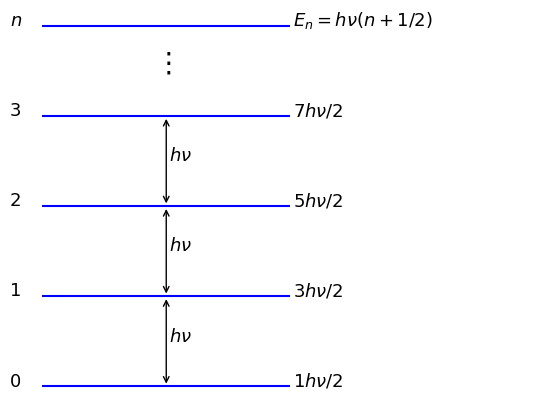

In [2]:
xmin = 0; xmax = 1
for j in range(0,5): # desenha as linhas
    plt.hlines(j,xmin,xmax,color='blue'); 
for j in range(0,4): # valores de n e de En, e hw e <->
    plt.text(-0.13,j,j,color='black',fontsize=13); 
    plt.text(1.01,j, str(2*j+1)+r'$h\nu/2$',color='black',fontsize=13)
for j in range(0,3):
    plt.annotate("", xy=(0.5,j), xytext=(0.5,j+1), 
                 arrowprops=dict(arrowstyle="<->"))
    plt.text(0.51,(2*j+1)/2,r'$h\nu$',fontsize=13)
plt.text(0.45,3.5,r'$\vdots$',fontsize=20)
plt.text(-0.13,4,r'$n$',color='black',fontsize=13)
plt.text(1.01,4,r'$E_{n}=h\nu(n+1/2)$',fontsize=13)
plt.axis('off'); plt.xlim(0,2); plt.ylim(-0.05,4.05)
plt.show()

---
### Auto-funções
Do que vimos acima, temos que
\begin{equation}
\Xi_{n}(u)=c_{d}e^{-u^{2}/2}H^{P}_{n}(u),
\end{equation}
com
\begin{cases}
H_{n}^{p}:=\sum_{j=0}^{n/2}a_{2j}(n)u^{2j}=a_{0}+a_{2}(n)u^{2}+a_{4}(n)u^{4}+a_{6}(n)u^{6}+\cdots, \\
H_{n}^{i}:=\sum_{j=0}^{(n-1)/2}a_{2j+1}(n)u^{2j+1}=a_{1}+a_{3}(n)u^{3}+a_{5}(n)u^{5}+a_{7}(n)u^{7}+\cdots.
\end{cases}
Usando $\beta/\alpha=2n+1$, e a relação de recursão para os coeficientes de $H_{n}^{P}$, escrevemos
\begin{equation}
a_{l+2} = \frac{2l+1-\beta/\alpha}{(l+2)(l+1)}a_{l} = \frac{2l+1-2n-1}{(l+2)(l+1)}a_{l} =\frac{2(l-n)}{(l+2)(l+1)}a_{l},
\end{equation}
que, definindo $m=l+2\therefore l =m-2$, pode ser reescrita como:
\begin{equation}
a_{m} =\frac{2(m-2-n)}{(m-2+2)(m-2+1)}a_{m-2}\therefore a_{l}=a_{l}(n) =\frac{2(l-n-2)}{l(l-1)}a_{l-2}(n).
\end{equation}

Olhando para casos particulares, teremos, para as funções pares:
\begin{equation}
H^{p}_{0}=a_{0} =: a_{0}R_{0}(u) \equiv a_{0}e^{u^{2}}\frac{\partial^{0}}{\partial u^{0}}e^{-u^{2}}.
\end{equation}

Usando $a_{2}(2) =\frac{2(2-2-2)}{2(2-1)}a_{0}=-2a_{0}$ obteremos
\begin{align}
H_{2}^{p} & = a_{0}+a_{2}(2)u^{2} = a_{0}-2a_{0}u^{2}=a_{0}(1-2u^{2})  \\
& =\frac{-a_{0}}{2}(4u^{2}-2) =: \frac{-a_{0}}{2}R_{2}(u) \equiv \frac{-a_{0}}{2}e^{u^{2}}\frac{\partial^{2}}{\partial u^{2}}e^{-u^{2}}.
\end{align}

Usando $a_{2}(4) =\frac{2(2-4-2)}{2(2-1)}a_{0}=-4a_{0}$ e $a_{4}(4) =\frac{2(4-4-2)}{4(4-1)}a_{2}(4)=4a_{0}/3$ obtemos
\begin{align}
H_{4}^{p} & = a_{0}+a_{2}(4)u^{2}+a_{4}(4)u^{4} = a_{0}-4a_{0}u^{2}+(4/3)a_{0}u^{4}=a_{0}(1-4u^{2}+(4/3)u^{4}) \\
& =\frac{a_{0}}{12}(12-48u^{2}+16u^{4}) =: \frac{a_{0}}{12}R_{4}(u) \equiv \frac{a_{0}}{12}e^{u^{2}}\frac{\partial^{4}}{\partial u^{4}}e^{-u^{2}}.
\end{align}

Usando $a_{2}(6) =\frac{2(2-6-2)}{2(2-1)}a_{0}=-6a_{0}$, $a_{4}(6) =\frac{2(4-6-2)}{4(4-1)}a_{2}(6)=4a_{0}$ e $a_{6}(6) =\frac{2(6-6-2)}{6(6-1)}a_{4}(6)=-(16/30)a_{0}$ obtemos
\begin{align}
H_{6}^{p} & = a_{0}+a_{2}(6)u^{2}+a_{4}(6)u^{4}+a_{6}(6)u^{6} = a_{0}-6a_{0}u^{2}+4a_{0}u^{4} -(16/30)u^{6}\\
& = \frac{-a_{0}}{120}(-120+720u^{2}-480u^{4}+64u^{6}) =: \frac{-a_{0}}{120}R_{6}(u) \equiv \frac{-a_{0}}{120}e^{u^{2}}\frac{\partial^{6}}{\partial u^{6}}e^{-u^{2}}.
\end{align}

Generalizando para valores maiores de $n$, podemos inferir que
\begin{equation}
H_{n}^{p} = ca_{0}R_{n}(u)=ca_{0}e^{u^{2}}\frac{\partial^{n}}{\partial u^{n}}e^{-u^{2}},
\end{equation}
com $c$ sendo uma constante real. Como vocês verificarão, podemos inferir também que
\begin{equation}
H_{n}^{i} = -ca_{1}R_{n}(u)=-ca_{1}e^{u^{2}}\frac{\partial^{n}}{\partial u^{n}}e^{-u^{2}}.
\end{equation}
Juntando esses resultados, chegamos na chamada __fórmula de Rodrigues__:
\begin{equation}
R_{n}(u) = (-1)^{n}e^{u^{2}}\frac{\partial^{n}}{\partial u^{n}}e^{-u^{2}},
\end{equation}
que está implementada na função abaixo, para qualquer valor de $n\in\mathbb{N}$. Os polinômis $R_{n}$, obtidos usando a fórmula de Rodrigues, são chamados de __polinômios de Hermite__.

In [3]:
from sympy import exp, diff, symbols, simplify

def rodrigues(n,u):
    if n == 0:
        return 1
    rod = exp(-u**2)
    for j in range(1,n+1):
        rod = diff(rod,u)
    return ((-1)**n)*exp(u**2)*rod

u = symbols('u'); n=20; simplify(rodrigues(n,u))

1048576*u**20 - 99614720*u**18 + 3810263040*u**16 - 76205260800*u**14 + 866834841600*u**12 - 5721109954560*u**10 + 21454162329600*u**8 - 42908324659200*u**6 + 40226554368000*u**4 - 13408851456000*u**2 + 670442572800

In [4]:
u = symbols('u')
for n in range(0,10):
    print('R_'+str(n)+'=',simplify(rodrigues(n,u)))

R_0= 1
R_1= 2*u
R_2= 4*u**2 - 2
R_3= 8*u**3 - 12*u
R_4= 16*u**4 - 48*u**2 + 12
R_5= 32*u**5 - 160*u**3 + 120*u
R_6= 64*u**6 - 480*u**4 + 720*u**2 - 120
R_7= 128*u**7 - 1344*u**5 + 3360*u**3 - 1680*u
R_8= 256*u**8 - 3584*u**6 + 13440*u**4 - 13440*u**2 + 1680
R_9= 512*u**9 - 9216*u**7 + 48384*u**5 - 80640*u**3 + 30240*u


Absorvendo as constantes de $H^{p}_{l}$ e $H^{i}_{l}$ em $\Xi$ e renomeando que as constantes de normalização, teremos que as autofunções correspondentes às energias $E_{n}$ são dadas por:
\begin{equation}
\Xi_{n}(u) = c_{d}e^{-u^{2}/2}H_{n}(u)=:N_{n}e^{-u^{2}/2}R_{n}(u).
\end{equation}

#### Normalização da função de onda
Lembrando, $u=\sqrt{\alpha}x$ ($x\rightarrow\infty\Rightarrow u\rightarrow\infty, x\rightarrow-\infty\Rightarrow u\rightarrow-\infty$). Devemos ter assim
\begin{equation}
\int_{-\infty}^{+\infty}|\Xi(x)|^{2}dx=\frac{|N_{n}|^{2}}{\sqrt{\alpha}}\int_{-\infty}^{+\infty}e^{-u^{2}}R_{n}(u)^{2}du=1.
\end{equation}

Vamos definir agora a chamada _função geradora_:
\begin{equation}
G(u,s) := e^{u^{2}-(s-u)^{2}} = e^{-s^{2}+2su}.
\end{equation}
Notando que para uma função qualquer $f=f(s-u)$ temos $\partial_{s}f=-\partial_{u}f$:
\begin{cases}
\partial_{s}f = \partial_{s-u}f\partial_{s}(s-u)=\partial_{s-u}f, \\
\partial_{u}f = \partial_{s-u}f\partial_{u}(s-u)=-\partial_{s-u}f,
\end{cases}
obtemos
\begin{align}
\left(\frac{\partial^{n}G}{\partial s^{n}}\right)_{s=0} & = \left(\frac{\partial^{n}e^{u^{2}-(s-u)^{2}}}{\partial s^{n}}\right)_{s=0} = e^{u^{2}}\left(\frac{\partial^{n}e^{-(s-u)^{2}}}{\partial s^{n}}\right)_{s=0} = e^{u^{2}}\left((-1)^{n}\frac{\partial^{n}e^{-(s-u)^{2}}}{\partial u^{n}}\right)_{s=0} \\ 
& = (-1)^{n}e^{u^{2}}\frac{\partial^{n}e^{-u^{2}}}{\partial u^{n}} = R_{n}(u).
\end{align}
Deste resultado, expandindo $G(u,s)$ em série de Taylor em torno de $s=0$, obtemos
\begin{equation}
G(u,s)_{s=0} = \sum_{n=0}^{\infty}\left(\frac{\partial^{n}G}{\partial s^{n}}\right)_{s=0}\frac{s^{n}}{n!} = \sum_{n=0}^{\infty}R_{n}(u)\frac{s^{n}}{n!}.
\end{equation}

Por conseguinte (usamos integral Gaussiana: $\int_{-\infty}^{+\infty}e^{-ax^{2}}dx=\sqrt{\pi/a}$):
\begin{align}
& \int_{-\infty}^{+\infty}e^{-u^{2}}G(u,s)_{s=0}G(u,t)_{t=0}du = \int_{-\infty}^{+\infty}e^{-u^{2}}\left(e^{-s^{2}+2su}\right)_{s=0}\left(e^{-t^{2}+2tu}\right)_{t=0}du \\
& = \int_{-\infty}^{+\infty}\left(e^{-(u^{2}-2u(s+t)+(s+t)^{2}-2st)}\right)_{s=0,t=0}du \\
& = \left(e^{2st}\int_{-\infty}^{+\infty}e^{-(u-(s+t))^{2}}du\right)_{s=0,t=0}\\ 
& = \left(e^{2st}\int_{-\infty}^{+\infty}e^{-w^{2}}dw\right)_{s=0,t=0} \\
& = \left(e^{2st}\sqrt{\pi}\right)_{s=0,t=0} \\
& = \sqrt{\pi}\sum_{n=0}^{\infty}\frac{(2st)^{n}}{n!} \\ 
& = \sum_{n=0}^{\infty}\frac{s^{n}t^{n}}{n!n!}\sqrt{\pi}2^{n}n! \\
& = \sum_{n,m=0}^{\infty}\frac{s^{n}t^{m}}{n!m!}\sqrt{\pi}2^{n}n!\delta_{n,m}\\
& = \int_{-\infty}^{+\infty}e^{-u^{2}}\sum_{n=0}^{\infty}R_{n}(u)\frac{s^{n}}{n!}\sum_{m=0}^{\infty}R_{m}(u)\frac{t^{m}}{m!}du \\
& = \sum_{n,m=0}^{\infty}\frac{s^{n}t^{m}}{n!m!}\int_{-\infty}^{+\infty}e^{-u^{2}}R_{n}(u)R_{m}(u)du.
\end{align}
Igualando os coeficientes de $s^{n}t^{m}$ nas expressões acima, temos que
\begin{cases}
\int_{-\infty}^{+\infty}e^{-u^{2}}R_{n}(u)R_{m}(u)du = 0 \text{ se } m\ne n, \\
\int_{-\infty}^{+\infty}e^{-u^{2}}R_{n}(u)R_{m}(u)du = \int_{-\infty}^{+\infty}e^{-u^{2}}R_{n}(u)^{2}du = \sqrt{\pi}2^{n}n! \text{ se } m=n.
\end{cases}

Finalmente, assumindo $N_{n}\in\mathbb{R}$, obtemos a constante de normalização
\begin{equation}
N_{n} = \sqrt{\frac{\sqrt{\alpha}}{\sqrt{\pi}2^{n}n!}}
\end{equation}
e as autofunções
\begin{equation}
\Xi_{n}(u) = \sqrt{\frac{\sqrt{\alpha}}{\sqrt{\pi}2^{n}n!}}e^{-u^{2}/2}R_{n}(u) \therefore \Xi_{n}(x) = \sqrt{\frac{\sqrt{\alpha}}{\sqrt{\pi}2^{n}n!}}e^{-\alpha x^{2}/2}R_{n}(\sqrt{\alpha}x),
\end{equation}
com $n=0,1,2,3,\cdots$ e $\alpha=2m\pi\nu/\hbar$.

In [5]:
from sympy import sqrt, pi, factorial

def wf_ohq(al,u,n):
    return sqrt(sqrt(al)/(sqrt(pi)*(2**n)*factorial(n)))\
*exp(-u**2/2)*rodrigues(n,u)

al, u = symbols('alpha u'); n=2; simplify(wf_ohq(al,u,n))

sqrt(2)*alpha**(1/4)*(u**2 - 1/2)*exp(-u**2/2)/pi**(1/4)

In [6]:
al = symbols('alpha')

for n in range(0,10):
    print('Xi_'+str(n)+'=',simplify(wf_ohq(al,u,n)))

Xi_0= alpha**(1/4)*exp(-u**2/2)/pi**(1/4)
Xi_1= sqrt(2)*alpha**(1/4)*u*exp(-u**2/2)/pi**(1/4)
Xi_2= sqrt(2)*alpha**(1/4)*(u**2 - 1/2)*exp(-u**2/2)/pi**(1/4)
Xi_3= sqrt(3)*alpha**(1/4)*u*(2*u**2 - 3)*exp(-u**2/2)/(3*pi**(1/4))
Xi_4= sqrt(6)*alpha**(1/4)*(u**4/3 - u**2 + 1/4)*exp(-u**2/2)/pi**(1/4)
Xi_5= sqrt(15)*alpha**(1/4)*u*(4*u**4 - 20*u**2 + 15)*exp(-u**2/2)/(30*pi**(1/4))
Xi_6= sqrt(5)*alpha**(1/4)*(8*u**6 - 60*u**4 + 90*u**2 - 15)*exp(-u**2/2)/(60*pi**(1/4))
Xi_7= sqrt(70)*alpha**(1/4)*u*(8*u**6 - 84*u**4 + 210*u**2 - 105)*exp(-u**2/2)/(420*pi**(1/4))
Xi_8= sqrt(70)*alpha**(1/4)*(16*u**8 - 224*u**6 + 840*u**4 - 840*u**2 + 105)*exp(-u**2/2)/(1680*pi**(1/4))
Xi_9= sqrt(35)*alpha**(1/4)*u*(16*u**8 - 288*u**6 + 1512*u**4 - 2520*u**2 + 945)*exp(-u**2/2)/(2520*pi**(1/4))


In [7]:
import math
h = 6.626069*10**-34
hb = h/(2*math.pi)
me = 9.109382*10**-31
from ipywidgets import interactive, interact, fixed, interact_manual, widgets

def fo(al,u,n): # Escreve a função de onda em um código Python
    f = open("fo_ohq.py","w"); f.write("def wf(alpha,u,n):\n"); 
    f.write("    from math import exp,sqrt,pi \n");
    f.write("    return "+str(simplify(wf_ohq(al,u,n)))); f.close()
    
def xi_ohq(n):
    plt.figure(figsize = (6,4), dpi = 100)
    import importlib; import fo_ohq; importlib.reload(fo_ohq)
    nu = 10**13; m = me; hbb = hb; alpha = 2*m*math.pi*nu/hbb; 
    k = 4*m*(math.pi**2)*nu**2; E = hbb*nu*(n+1/2)
    N = 300; xmin = -1.3*10**-8; xmax = -xmin; dx = (xmax-xmin)/N; 
    x = np.zeros(N); u = np.zeros(N); y = np.zeros(N)
    #U = np.zeros(N); pc = np.zeros(N)
    for j in range(0,N):
        x[j] = xmin + j*dx; u[j] = math.sqrt(alpha)*x[j]#; U[j] = 0.5*k*x[j]**2*(10**23)
        y[j] = fo_ohq.wf(alpha,u[j],n)
        #y[j] = y[j]**2 # para plotar a densidade de probabilidade
        #if E > k*(x[j]**2)/2:
        #    pc[j] = 4*10**12/math.sqrt(2*(abs(E-k*(x[j]**2)/2))/m) # probabilidade clássica
    plt.plot(x,y)#; plt.plot(x,U)#; plt.plot(x,pc)
    plt.xlabel(r'$x$'); plt.ylabel(r'$\Xi$')
    plt.xlim(xmin,xmax); ym = 1.1*np.amax(y); plt.ylim(-ym,ym)
    plt.legend((r'$\Xi$',r'$10^{23}U$',r'$\rho(x)_{classica}$'),loc=(1.01,0.5), fontsize=13)
    plt.annotate(r'$n=$'+str(n), xy=(0,0.8*ym), xytext=(0,0.8*ym), fontsize=12)
    plt.show()
    
def plot_wf_qho(n):
    fo(al,u,n); import importlib; import fo_ohq; importlib.reload(fo_ohq); xi_ohq(n)
    
interactive(plot_wf_qho,n=(0,30,1))
#plot_wf_qho(100)

interactive(children=(IntSlider(value=15, description='n', max=30), Output()), _dom_classes=('widget-interact'…

Não discutiremos aqui cálculos de valores médios de posição e de momento linear, pois esses cálculos são muito mais fáceis de fazer pelo método algébrico, que será estudado na sequência.

---
# Exercícios

$1.$ Verifique, no limite $|u|\gg1$, que a função $\Xi(u) = c_{c}e^{u^{2}/2}+c_{d}e^{-u^{2}/2}$ é solução da eq. diferencial $\partial_{uu}\Xi(u) -u^{2}\Xi(u)=0$.

$2.$ Vocês podem ter se perguntado porquê fizemos tantas manipulações nas eqs. diferenciais antes de aplicar o método de solução por série de potências. Para ver o motivo, aplique esse método na eq. $(\star)$, para então notar que as equações obtidas envolvem 3 coeficientes, e não 2, impossibilitando a obtenção de uma relação de recursão simples.

$3.$ Verifique que a diferença de energia entre dois níveis quaisquer $n$ e $n'$ do OHQ1D é um múltiplo inteiro de $h\nu$ (e que, portanto, a frequência da radiação eletromagnética emitida ou absorvida quando de transições entre esses níveis é um múltiplo inteiro de $\nu$).

$4.$ Calcule explicitamente $H_{n}^{i}$ para $n=1,3,5,7$ e verifique que estas funções podem ser escritas como $H_{n}^{i} = -ca_{1}R_{n}(u)=-ca_{1}e^{u^{2}}\frac{\partial^{n}}{\partial u^{n}}e^{-u^{2}}$, com $c$ sendo uma constante real.

$5.$ Para o OHQ1D, calcule a diferença de energia entre estados 'vizinhos' por unidade de energia, i.e., calcule $(E_{n}-E_{n-1})/E_{n}$, verificando que esta tende a zero para $n\gg 1$, estando assim de acordo com o princípio de correspondência de Bohr.

$6.$ Partindo da equação de autovalores e autovetores para o Hamiltoniano do OHQ1D, $H\Xi_{n}=E_{n}\Xi_{n}$ com $H=P^{2}/2m+kX^{2}/2$, verifique que os valores médios do quadrado do memonto linear e do quadrado da posição são relacionados por:
\begin{equation}
\langle P^{2}\rangle = 2mE_{n}-mk\langle X^{2}\rangle.
\end{equation}

$7.$ Verifique que as autofunções do OHQ1D correspondentes a autoenergias diferentes são ortogonais, i.e., verifique que $\langle\Xi_{n}|\Xi_{m}\rangle=\int_{-\infty}^{+\infty}\Xi_{n}^{*}(x)\Xi_{m}(x)dx=0$ para $m\ne n$.

$8.$ Para uma partícula clássica sujeita a um potencial do tipo do oscilador harmônico, obtenha a densidade de probabilidade $\rho(x)$, de encontrarmos a partícula entre as posições $x$ e $x+dx$.

In [9]:
from sympy import integrate

E,k,m,x = symbols('E k m x'); integrate(1/sqrt((2/m)*(E-k*x**2/2)),(x,-2*E/k,2*E/k))

Piecewise((log(-2*E/m + sqrt(2)*sqrt(-k/m)*sqrt(-2*E**2/(k*m) + E/m))/sqrt(-k/m) - log(2*E/m + sqrt(2)*sqrt(-k/m)*sqrt(-2*E**2/(k*m) + E/m))/sqrt(-k/m), Ne(E/m, 0) & Ne(k/m, 0)), (2*sqrt(2)*E/(k*sqrt(E/m)), Ne(E/m, 0)), (E*log(-2*E/k)/(k*sqrt(-E**2/(k*m))) + E*log(2*E/k)/(k*sqrt(-E**2/(k*m))), Ne(k/m, 0)), (2*sqrt(2)*E/(k*sqrt(E/m)), True))